In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tabulate import tabulate
%matplotlib inline
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('C:/Users/Nikhil_Chamle/Desktop/P1/Customer segmnetation/Data.csv')

In [3]:
df = data.copy()

In [4]:
df.head(7)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [7]:
null_values = df.isnull().sum()/len(df) * 100

In [8]:
null_values

CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

In [9]:
df.duplicated().sum()

0

In [10]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [11]:
df.drop('CustomerID', axis=1, inplace=True)
df.head(7)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6


Text(0, 0.5, 'Count')

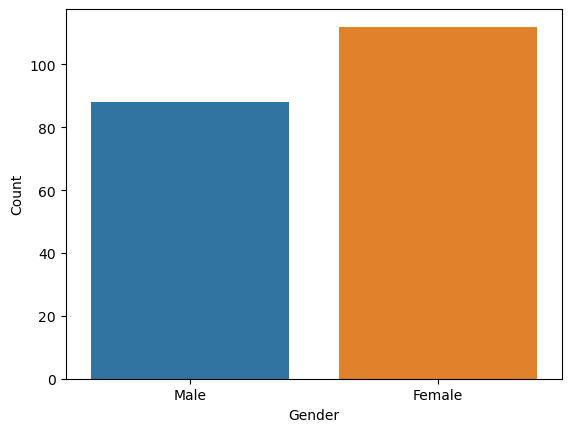

In [12]:
sns.countplot(x='Gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')

In [13]:
df.shape

(200, 4)

In [14]:
int1 = []
obj1 = []

for i in df.columns:
    if df[i].dtypes == 'int64':
        int1.append(i)
    else:
        obj1.append(i)

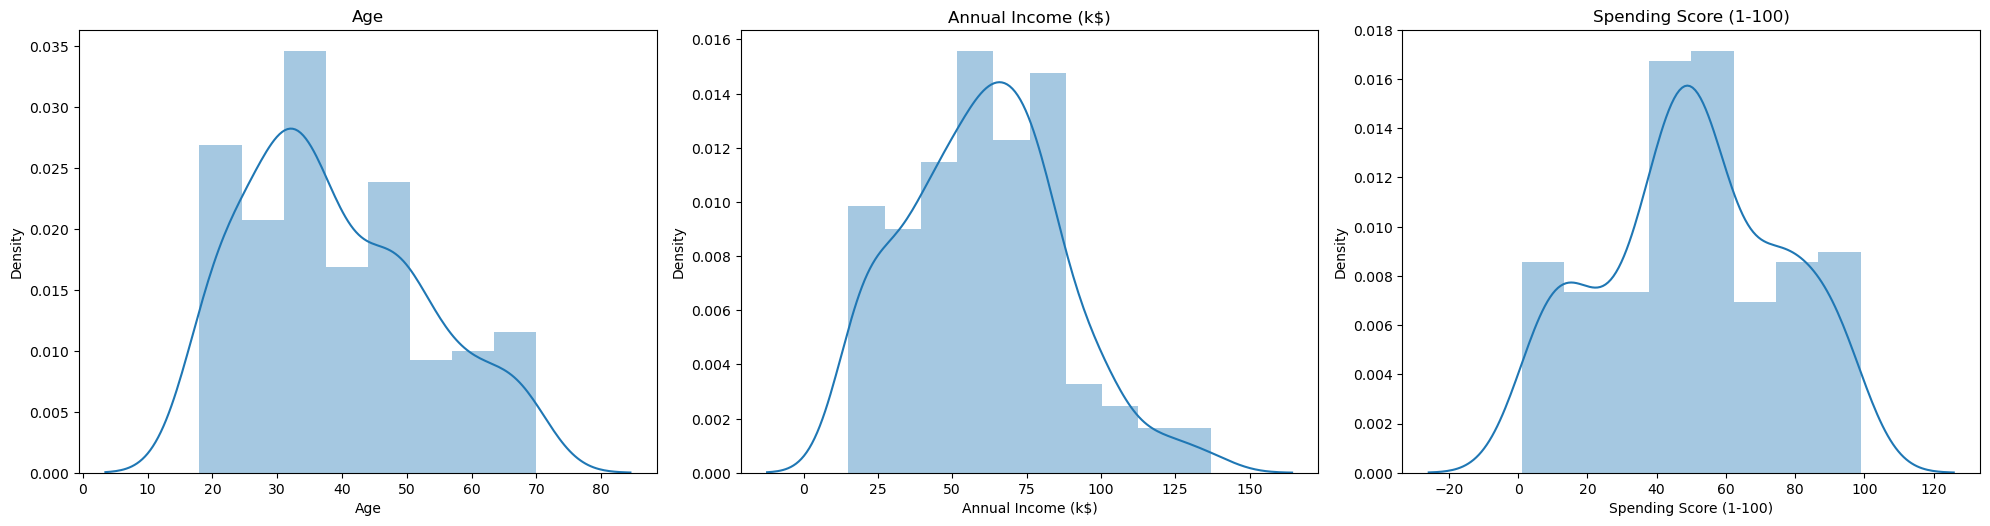

In [15]:
plt.figure(figsize=(20, 35))

for i in range(0, len(int1)):
    plt.subplot(7, 3, i + 1)
    sns.distplot(df[int1[i]])
    plt.title(int1[i])

plt.tight_layout()
plt.show()

In [16]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [17]:
df = df.rename(columns={'Annual Income (k$)': 'annual_income'})
df = df.rename(columns={'Spending Score (1-100)': 'spending_score'})

In [18]:
df.columns

Index(['Gender', 'Age', 'annual_income', 'spending_score'], dtype='object')

In [19]:
df.head(7)

,Gender,Age,annual_income,spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6


<Axes: xlabel='Age', ylabel='spending_score'>

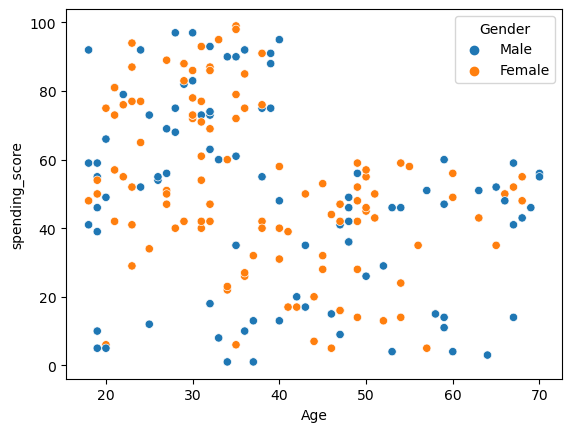

In [20]:
sns.scatterplot(data=df, x='Age', y='spending_score', hue='Gender')

<Axes: xlabel='annual_income', ylabel='spending_score'>

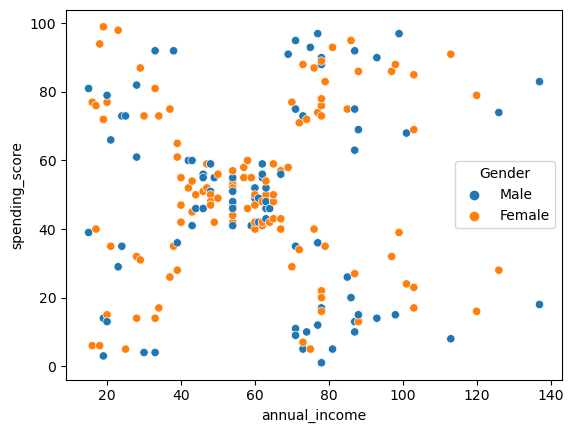

In [21]:
sns.scatterplot(data=df, x='annual_income', y='spending_score', hue='Gender')

In [22]:
# 1. A notable correlation is observed between Age and Spending Score, revealing that individuals with Spending Scores exceeding 65 tend to fall within the age range of 15-42 years. Furthermore, the scatter plot indicates a disproportionate representation of females within this high-spending cohort.
# 2. Conversely, customers exhibiting average Spending Scores (40-60) encompass a broader age spectrum of 15-75 years. Notably, this mid-range spending group demonstrates a relatively equal distribution of males and females.
# 3. Spending Scores > 65 are positively correlated with younger adults (15-42 years), with a skewed female demographic.
# 4. Average Spending Scores (40-60) are characterized by a diverse age range (15-75 years) and a balanced gender distribution.
# 5. Younger adults (15-42 years) tend to have higher Spending Scores, and more women than men fall into this category.
# 6. People with average Spending Scores come from a wide range of ages (15-75 years), and men and women are equally represented in this group.

In [23]:
# Annual Income vs. Spending Score Clusters
# The plot reveals five distinct clusters, which can be categorized as follows:
# a. Affluent Spenders (Top Right Cluster): High annual income and high spending scores, indicating a strong correlation between financial capacity and expenditure.
# b. Frugal Affluents (Bottom Right Cluster): High annual income but low spending scores, suggesting a cautious approach to spending despite financial means.
# c. Middle Class (Center Cluster): Average annual income and average spending scores, representing a balanced financial situation.
# d. Aspirational Spenders (Top Left Cluster): Low annual income but high spending scores, indicating a desire to spend despite limited financial resources.
# e. Financially Constrained (Bottom Left Cluster): Low annual income and low spending scores, reflecting limited financial capacity and reduced expenditure.

In [24]:
# selecting annual income and spending scores
X = df.iloc[:, [2,3]]

In [25]:
X.columns

Index(['annual_income', 'spending_score'], dtype='object')

In [26]:
# elbow method, Calculating WCSS values for 1 to 10 clusters

wcss = []
for i in range(1,11):
  kmeans_model = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans_model.fit(X)
  wcss.append(kmeans_model.inertia_)

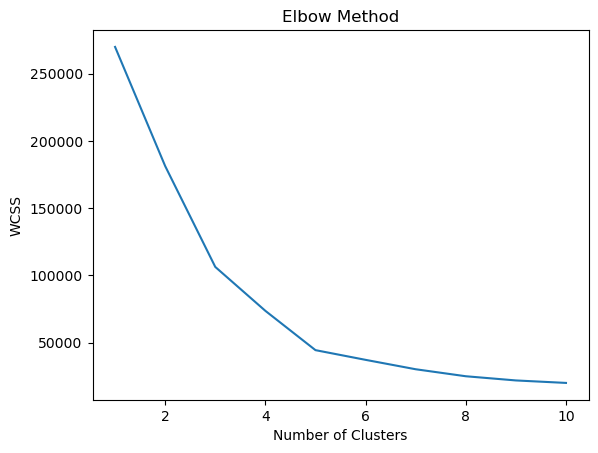

In [27]:
# Plotting the WCSS values
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
# From the above plot it is observed that 5 clusters are optimal for the given dataset.

In [29]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [30]:
# Training the KMeans model with n_clusters=5
kmeans_model = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans_model.fit_predict(X)

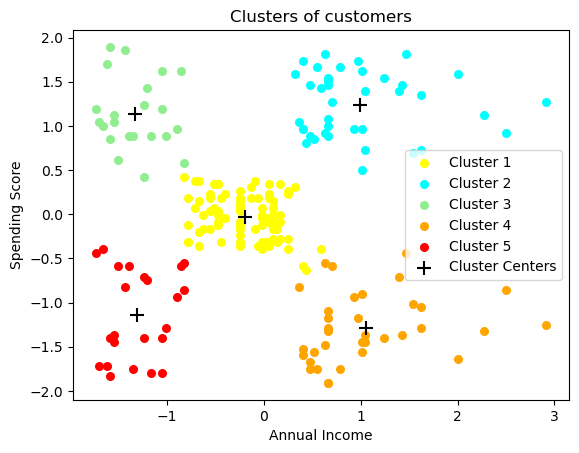

In [31]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 30, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 30, c = 'cyan', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 30, c = 'lightgreen', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 30, c = 'orange', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 30, c = 'red', label = 'Cluster 5')
plt.scatter(x=kmeans_model.cluster_centers_[:, 0], y=kmeans_model.cluster_centers_[:, 1], s=100, c='black', marker='+', label='Cluster Centers')
plt.legend()
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [32]:
# Clustering Insights and Strategic Recommendations
# a. Loyal High-Spenders (Cluster 5): Target these high-income, high-spending customers with personalized new product alerts to leverage their loyalty and drive revenue growth.
# b. Untapped Potential (Cluster 3): Engage high-income, low-spending customers through feedback mechanisms and targeted advertising to unlock their potential and upgrade them to loyal high-spenders.
# c. Middle Ground (Cluster 2): Offer affordable financing options, such as low-cost EMIs, to average-income, average-spending customers, fostering a sense of accessibility and loyalty.
# d. Discretionary Targets (Cluster 1): Exercise discretion when targeting low-income, high-spending customers, considering the mall's policies and potential resource constraints.
# e. Resource-Constrained (Cluster 4): Focus resources elsewhere, as low-income, low-spending customers prioritize saving and may not be receptive to marketing efforts.